In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('stock_details_5_years.csv')

print(data)

                             Date        Open        High         Low  \
0       2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   
1       2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595   
2       2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   
3       2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   
4       2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   
...                           ...         ...         ...         ...   
602957  2023-11-29 00:00:00-05:00   26.360001   26.397499   26.120001   
602958  2023-11-29 00:00:00-05:00   27.680000   28.535000   27.680000   
602959  2023-11-29 00:00:00-05:00   75.940002   76.555000   75.257500   
602960  2023-11-29 00:00:00-05:00   45.230000   45.259998   44.040001   
602961  2023-11-29 00:00:00-05:00   84.629997   84.995003   83.529999   

             Close     Volume  Dividends  Stock Splits Company  
0        43.083508  167080000       0.00           0.0    

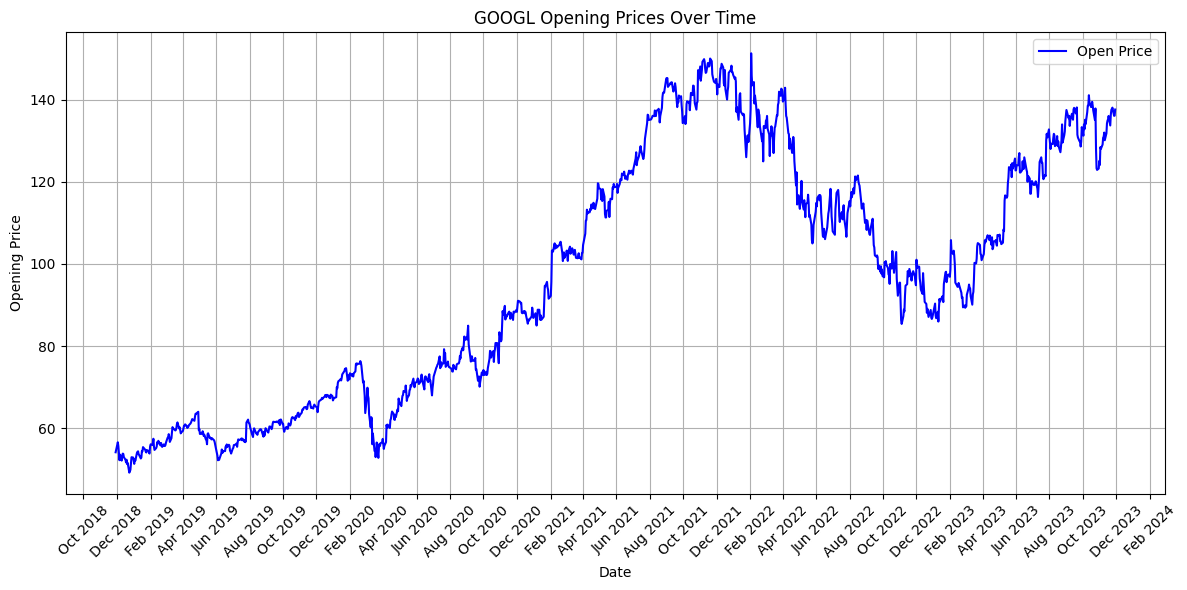

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the CSV file
data = pd.read_csv('stock_details_5_years.csv')

# Filter for rows where the Company is "GOOGL"
googl_data = data[data['Company'] == 'GOOGL'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'Date' to datetime format for better plotting, with utc=True to handle mixed time zones
googl_data['Date'] = pd.to_datetime(googl_data['Date'], utc=True)

# Plotting the 'Open' prices
plt.figure(figsize=(12, 6))
plt.plot(googl_data['Date'], googl_data['Open'], label='Open Price', color='blue')

# Formatting the x-axis to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Set major ticks to each month

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('GOOGL Opening Prices Over Time')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout to make room for x-labels
plt.legend()
plt.grid()
plt.show()


                          Date       Open       High        Low      Close  \
2    2018-11-29 05:00:00+00:00  54.176498  55.007500  54.099998  54.729000   
460  2018-11-30 05:00:00+00:00  54.781502  55.482498  54.159000  55.482498   
918  2018-12-03 05:00:00+00:00  56.608002  56.750000  55.586498  55.818001   
1376 2018-12-04 05:00:00+00:00  55.649502  55.712002  53.039001  53.123501   
1834 2018-12-06 05:00:00+00:00  52.250000  53.971001  52.124001  53.903999   

        Volume  Dividends  Stock Splits Company  Open_Change  
2     31004000        0.0           0.0   GOOGL     0.050999  
460   59668000        0.0           0.0   GOOGL     0.037502  
918   57532000        0.0           0.0   GOOGL     0.058002  
1376  45630000        0.0           0.0   GOOGL     0.037502  
1834  47436000        0.0           0.0   GOOGL     0.025501  


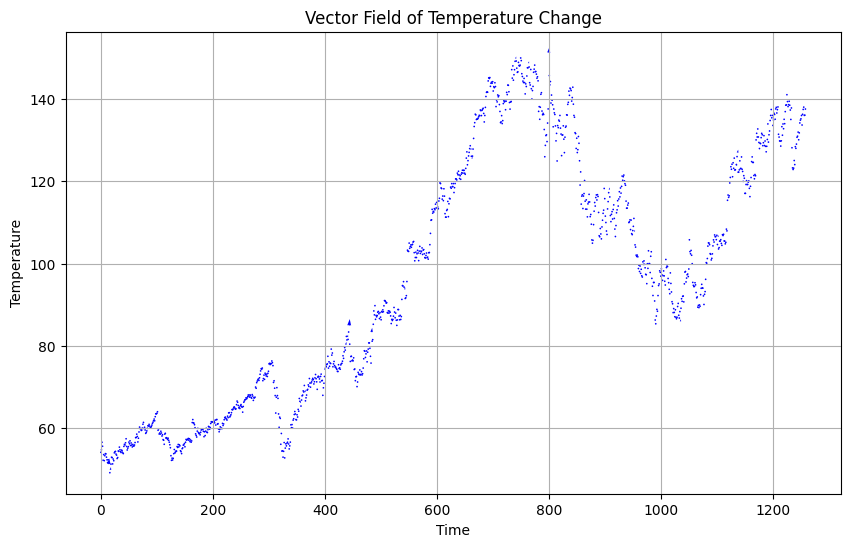

In [3]:
import numpy as np
sorted_googl = googl_data['Open'].sort_values()
googl_data['Open_Change'] = sorted_googl.diff()
print(googl_data.head())

y = googl_data['Open'].values
x = np.arange(len(y))

U = np.ones_like(y)
V = googl_data['Open_Change'].fillna(0).values

# Create a quiver plot for the vector field
plt.figure(figsize=(10, 6))
plt.quiver(x, y, U, V, angles='xy', scale_units='xy', scale=1, color='blue')

plt.title('Vector Field of Temperature Change')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid()
plt.show()

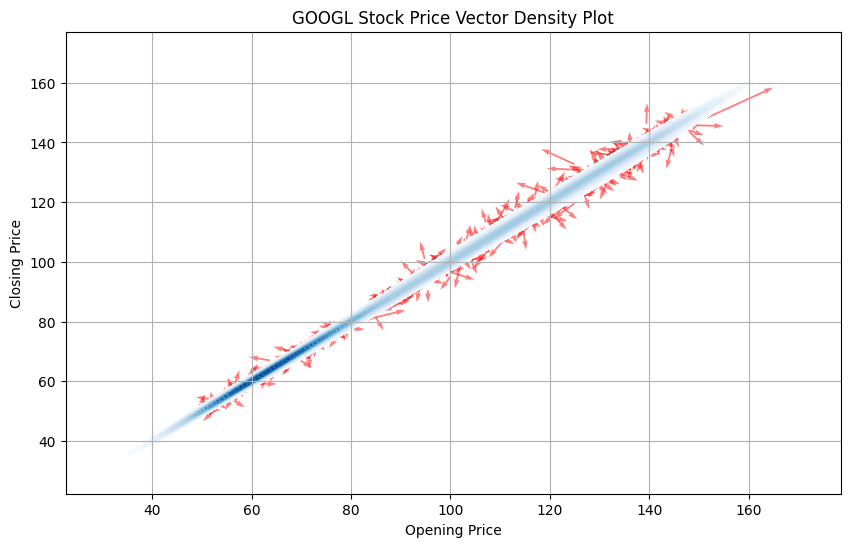

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'googl_data' has columns: ['Date', 'Open', 'Close']
googl_data = googl_data.sort_values(by='Date')  # Ensure data is sorted

# Compute velocity (daily change in Open and Close prices)
googl_data['Open_vel'] = googl_data['Open'].diff()
googl_data['Close_vel'] = googl_data['Close'].diff()

# Drop NaN values created by diff()
googl_data = googl_data.dropna()

# Set up the figure
plt.figure(figsize=(10, 6))

# Add a quiver plot (similar to geom_segment with arrows)
plt.quiver(
    googl_data['Open'], googl_data['Close'],  # Start points (x, y)
    googl_data['Open_vel'], googl_data['Close_vel'],  # Velocities (dx, dy)
    angles="xy", scale_units="xy", scale=1, color="red", alpha=0.5
)

# Add density contour (similar to stat_density2d)
sns.kdeplot(x=googl_data['Open'], y=googl_data['Close'], cmap="Blues", fill=True, levels=20)

# Labels and Title
plt.xlabel("Opening Price")
plt.ylabel("Closing Price")
plt.title("GOOGL Stock Price Vector Density Plot")

# Show plot
plt.grid()
plt.show()


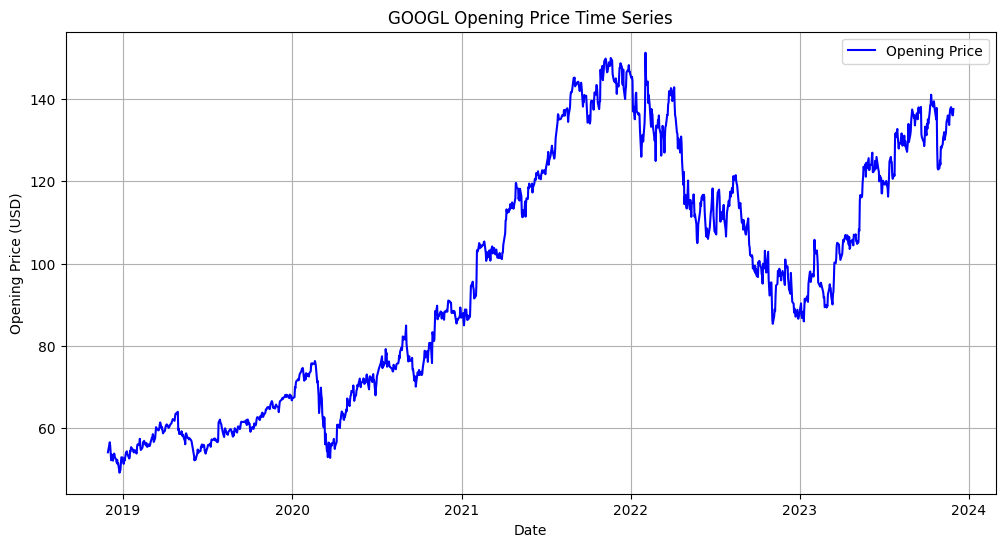

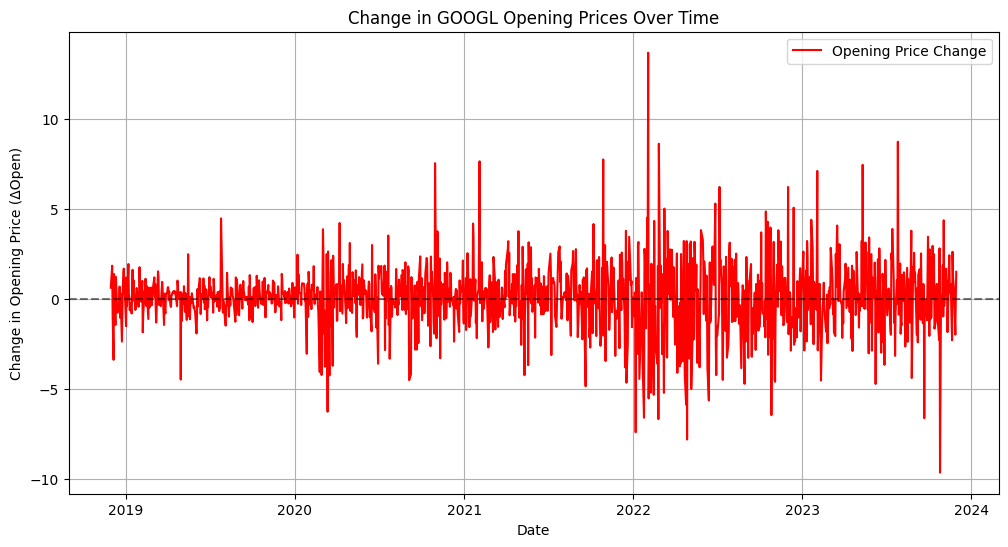

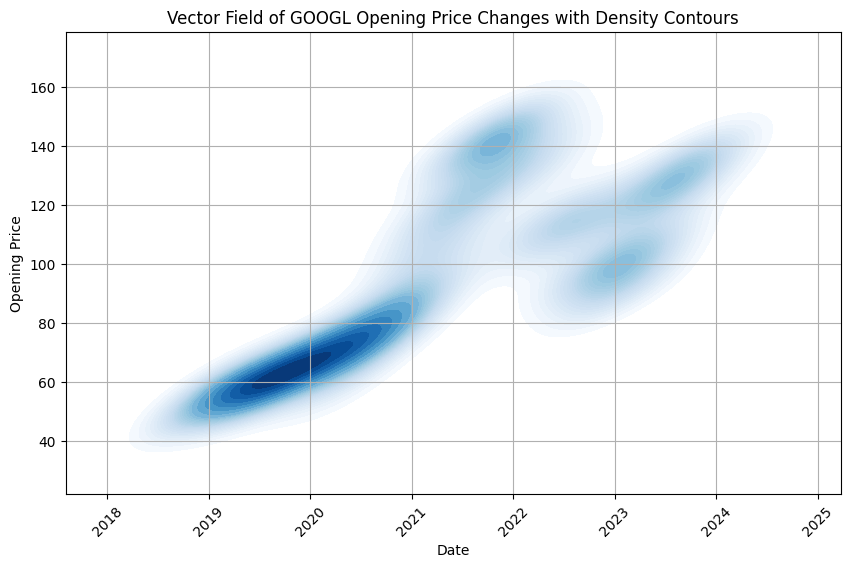

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('stock_details_5_years.csv')

# Filter for GOOGL stock
googl_data = data[data['Company'] == 'GOOGL'].copy()

# Ensure 'Date' is in datetime format and sort data
googl_data['Date'] = pd.to_datetime(googl_data['Date'], utc=True)
googl_data = googl_data.sort_values(by='Date')

# --- Step 2: Plot Opening Prices Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(googl_data['Date'], googl_data['Open'], color='blue', label='Opening Price')
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.title("GOOGL Opening Price Time Series")
plt.grid()
plt.legend()
plt.show()

# --- Step 3: Compute Change in Opening Price (Velocity) ---
googl_data['Open_Change'] = googl_data['Open'].diff()

# --- Step 4: Plot Change in Opening Price Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(googl_data['Date'], googl_data['Open_Change'], color='red', label='Opening Price Change')
plt.xlabel("Date")
plt.ylabel("Change in Opening Price (ΔOpen)")
plt.title("Change in GOOGL Opening Prices Over Time")
plt.axhline(0, linestyle="--", color="black", alpha=0.5)  # Reference line at 0
plt.grid()
plt.legend()
plt.show()

# --- Step 5: Vector Field Plot with Density ---
plt.figure(figsize=(10, 6))

# Quiver plot (Vector field)
plt.quiver(
    googl_data['Date'].values[:-1], googl_data['Open'].values[:-1],  # Start points (x, y)
    np.ones(len(googl_data)-1), googl_data['Open_Change'].values[1:],  # X=constant, Y=velocity (ΔOpen)
    angles="xy", scale_units="xy", scale=1, color="red", alpha=0.5
)

# Density heatmap
sns.kdeplot(x=googl_data['Date'], y=googl_data['Open'], cmap="Blues", fill=True, levels=30)

plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.title("Vector Field of GOOGL Opening Price Changes with Density Contours")
plt.xticks(rotation=45)
plt.grid()
plt.show()


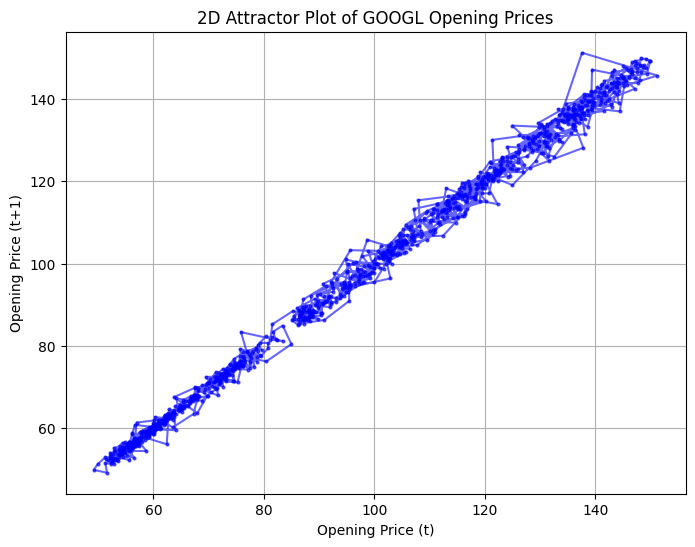

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('stock_details_5_years.csv')

# Filter for GOOGL stock
googl_data = data[data['Company'] == 'GOOGL'].copy()

# Ensure 'Date' is in datetime format and sort data
googl_data['Date'] = pd.to_datetime(googl_data['Date'], utc=True)
googl_data = googl_data.sort_values(by='Date')

# Select the Opening Price as the variable of interest
opening_prices = googl_data['Open'].values

# --- Step 2: Create Delay Embedding (t vs t+1) ---
lag1 = opening_prices[:-1]   # Opening Price at time t
lag2 = opening_prices[1:]    # Opening Price at time t+1

# --- Step 3: 2D Attractor Plot ---
plt.figure(figsize=(8, 6))
plt.plot(lag1, lag2, linestyle='-', marker='o', markersize=2, alpha=0.6, color='blue')

# Labels & Title
plt.xlabel("Opening Price (t)")
plt.ylabel("Opening Price (t+1)")
plt.title("2D Attractor Plot of GOOGL Opening Prices")
plt.grid(True)

plt.show()
